In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np



In [2]:
nombre_csv=1
data= pd.read_csv(f'../Datos_procesados/{nombre_csv}.csv')

data

,Fecha,Hora,period eating,period other,period resting,period rumination,T,RH,WS
0,2024-01-01,0,0.079,0.0,0.410,0.512,14.57,95.75,0.11
1,2024-01-01,1,0.000,0.0,0.653,0.347,14.32,95.00,0.18
2,2024-01-01,2,0.000,0.0,0.442,0.558,14.27,92.56,0.27
3,2024-01-01,3,0.000,0.0,0.463,0.537,14.36,89.38,0.22
4,2024-01-01,4,0.000,0.0,0.711,0.289,14.58,85.94,0.14
...,...,...,...,...,...,...,...,...,...
3931,2024-06-30,19,1.000,0.0,0.000,0.000,14.48,99.25,0.80
3932,2024-06-30,20,0.450,0.0,0.000,0.550,14.14,99.12,0.81
3933,2024-06-30,21,0.000,0.0,0.449,0.551,13.72,99.69,0.65
3934,2024-06-30,22,0.308,0.0,0.102,0.590,13.48,99.81,0.60


In [3]:
# Definir la fecha límite
fecha_limite = '2024-01-07'
# Filtrar el DataFrame hasta la fecha límite
df = data[data['Fecha'] <= fecha_limite]
df.drop(columns=['T','RH','WS'], inplace=True)
df


C:\Users\PC\AppData\Local\Temp\ipykernel_6816\1082405301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['T','RH','WS'], inplace=True)


,Fecha,Hora,period eating,period other,period resting,period rumination
0,2024-01-01,0,0.079,0.000,0.410,0.512
1,2024-01-01,1,0.000,0.000,0.653,0.347
2,2024-01-01,2,0.000,0.000,0.442,0.558
3,2024-01-01,3,0.000,0.000,0.463,0.537
4,2024-01-01,4,0.000,0.000,0.711,0.289
...,...,...,...,...,...,...
163,2024-01-07,19,0.000,0.165,0.009,0.826
164,2024-01-07,20,0.025,0.000,0.109,0.866
165,2024-01-07,21,0.053,0.000,0.354,0.592
166,2024-01-07,22,0.373,0.000,0.551,0.076


In [4]:

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Fecha', 'Hora'], axis=1))
# Aplicar PCA para análisis de correspondencia
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)


In [5]:
# Crear un DataFrame para los componentes principales
loadings = pca.components_.T
loadings_df = pd.DataFrame(data=loadings, index=df.columns[2:], columns=['Principal Component 1', 'Principal Component 2'])
# Calcular los pesos
weights_calculated = (loadings_df['Principal Component 1'] + loadings_df['Principal Component 2']) / 2
weights_calculated


period eating        0.261935
period other         0.462352
period resting      -0.459303
period rumination   -0.081616
dtype: float64

In [6]:
# Calcular el nivel de actividad para cada hora
activity_level = df.drop(['Fecha', 'Hora'], axis=1).dot(weights_calculated)

# Añadir el nivel de actividad al DataFrame original
df['activity_level'] = activity_level

C:\Users\PC\AppData\Local\Temp\ipykernel_6816\3777347208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity_level'] = activity_level


In [7]:
# Calcular el nivel de actividad para cada hora
activity_level = data.drop(['Fecha', 'Hora','T','RH','WS'], axis=1).dot(weights_calculated)

# Añadir el nivel de actividad al DataFrame original
data['activity_level'] = activity_level
data= data[['Fecha', 'Hora', 'period eating', 'period other', 'period resting', 'period rumination', 'activity_level', 'T', 'RH', 'WS']]
data.to_csv(f'../Datos_activ/{nombre_csv}cow.csv', index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_6816\2862454404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FechaHora'] = df.apply(lambda row: pd.Timestamp(row['Fecha']) + pd.Timedelta(hours=row['Hora']), axis=1)
C:\Users\PC\AppData\Local\Temp\ipykernel_6816\2862454404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('FechaHora', inplace=True)


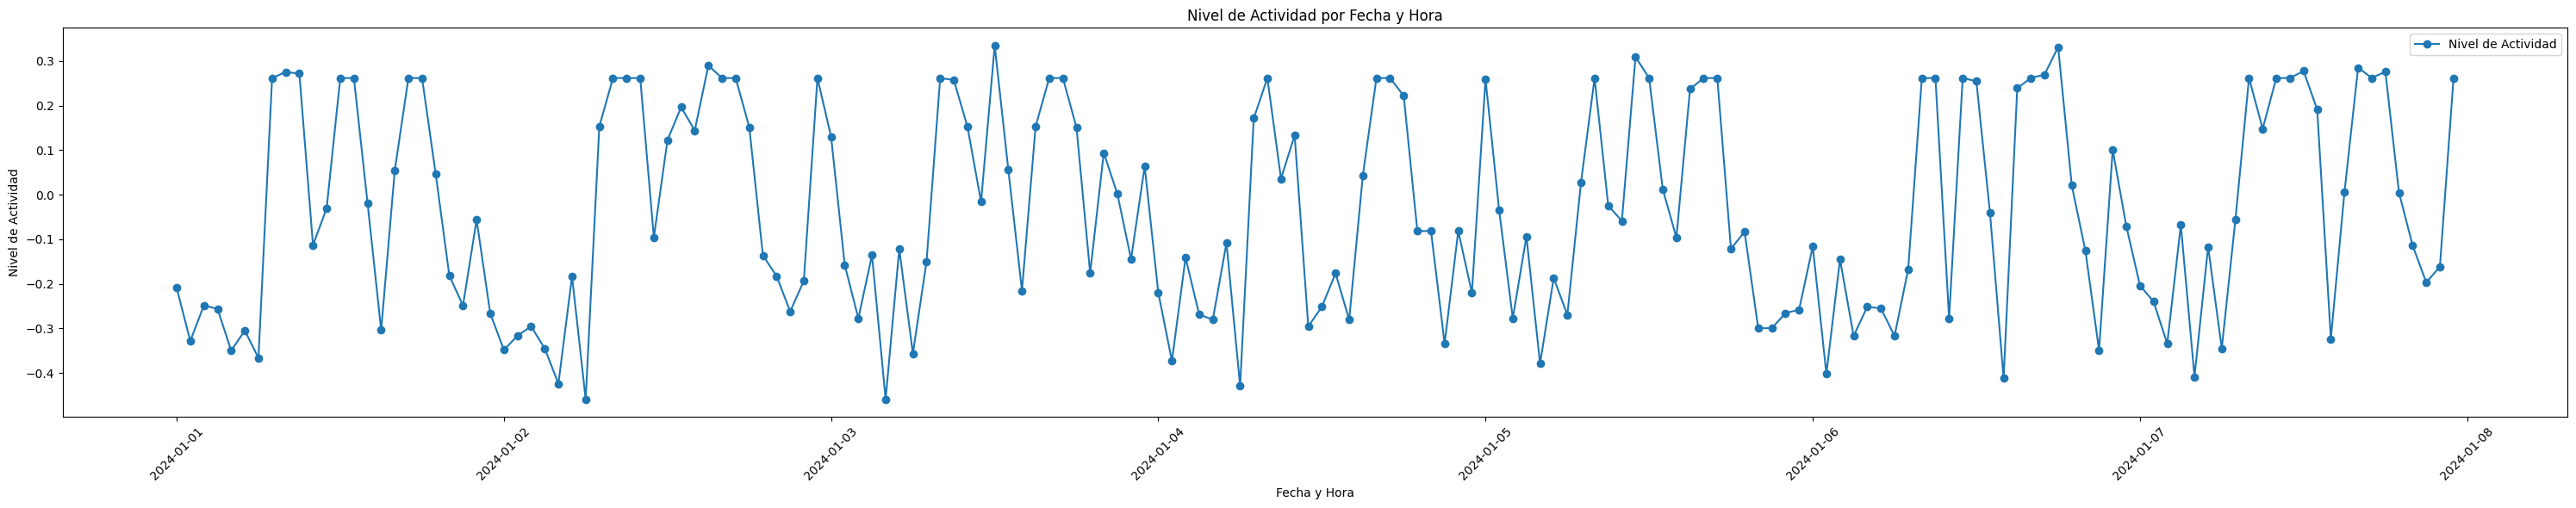

In [8]:
# Crear una nueva columna datetime combinando 'Fecha' y 'Hora'
df['FechaHora'] = df.apply(lambda row: pd.Timestamp(row['Fecha']) + pd.Timedelta(hours=row['Hora']), axis=1)

# Asegúrate de que los datos están ordenados por 'FechaHora'
df.sort_values('FechaHora', inplace=True)

# Visualizar los resultados como un gráfico de líneas
plt.figure(figsize=(30, 6))
plt.plot(df['FechaHora'], df['activity_level'], marker='o', label='Nivel de Actividad')

# Agregar etiquetas y título
plt.xlabel('Fecha y Hora')
plt.ylabel('Nivel de Actividad')
plt.title('Nivel de Actividad por Fecha y Hora')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()